# Unidad 03 - Visualización de datos y Seaborn

En éste Notebook vamos a aprender aspéctos básicos visualización de datos. Python no incluye un módulo para graficar.

Matplotlib es una biblioteca de Python esencial para la creación de gráficos y visualizaciones de datos. Es muy versatil, permitiendo generar desde gráficos simples, como líneas y dispersión, hasta complejas visualizaciones en 3D. Su principal fortaleza (y también debilidad) radica en el control detallado que proporciona sobre cada aspecto del gráfico, como los ejes, colores, etiquetas y estilos.

Documentación: https://matplotlib.org/

Código fuente: https://github.com/matplotlib/matplotlib

Seaborn es una biblioteca de visualización de datos en Python que se construye sobre Matplotlib y está diseñada para facilitar la creación de gráficos estadísticos atractivos y con un estilo predeterminado más refinado. A diferencia de Matplotlib, que ofrece una mayor flexibilidad pero requiere más configuración para lograr gráficos estilizados, Seaborn proporciona funciones de alto nivel que simplifican la visualización de datos complejos, como la creación de gráficos de distribución, correlación y categóricos con menos código. Además, Seaborn maneja automáticamente las paletas de colores y la estética, lo que permite generar gráficos más agradables visualmente con menor esfuerzo. Finalmente, se integra de forma natural con Pandas.

Documentación: https://seaborn.pydata.org/

Código fuente: https://github.com/mwaskom/seaborn

En la materia vamos a usar principalemente Seaborn, pero usando algunas funciones de Matplolib para manipulaciones específica.

Por cierto, si quieren graficar en la consola también pueden hacerlo con [plotext](https://github.com/piccolomo/plotext) u otras librerías similares.

*Este Notebook asume que ya tenés conocimientos básicos de Python, Jupyter Notebooks, NumPy y Pandas*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

### Seaborn objects y la gramática de gráficos

Presentado a finales de 2022, el nuevo sistema se basa en el paradigma de "Gramática de Gráficos", similar al utilizado por paquetes como ggplot2 en R. En lugar de memorizar múltiples métodos para crear gráficos, ahora se pueden generar todos a través de una única clase: `Plot()`.

**Buscá en la documentación la parte específica que corresponde a esta forma de hacer graficos en Seaborn**

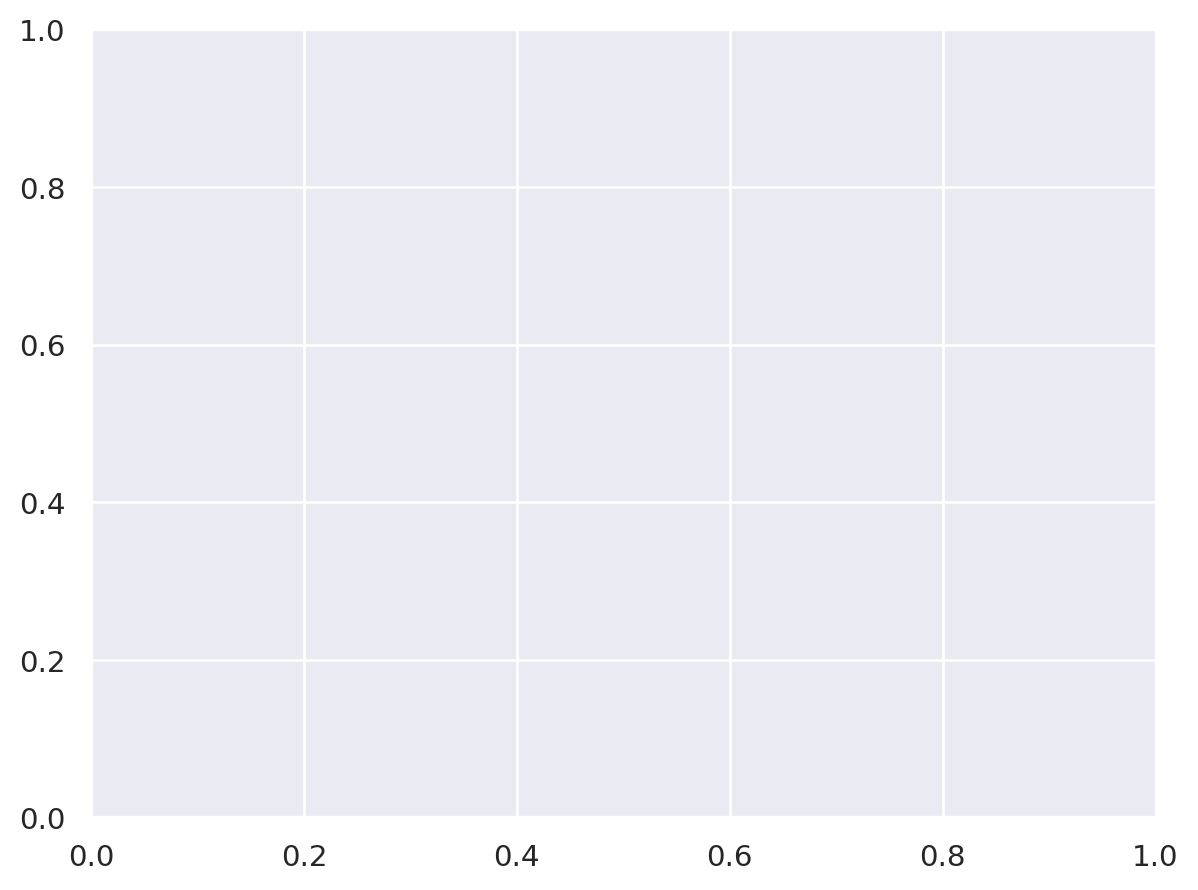

In [ ]:
# Comenzamos con un gráfico vacío
so.Plot()

In [ ]:
# Agregamos un conjunto de datos, por ejemplo un dataset con los pasajeros de vuelos.
# Para ver que otros datasets vienen incluidos en Seaborn podemos usar `sns.get_dataset_names()`
df = sns.load_dataset("flights")
df.head()


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


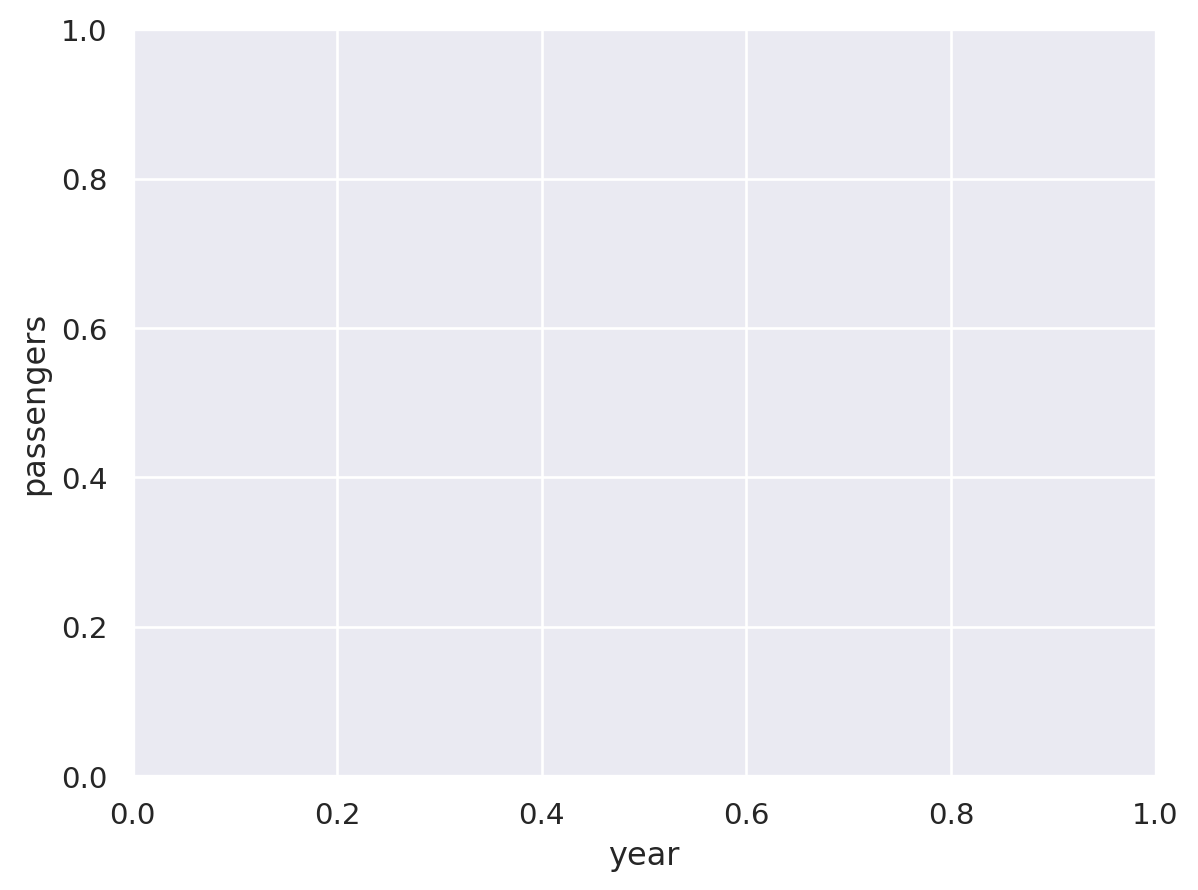

In [ ]:
# Mapeamos el año al eje X y los pasajeros al eje Y
so.Plot(data = df, x = "year", y = "passengers")

**¿Dónde están los datos?** Para eso hay que agregar algún tipo de datos como `Dot`

*Noten que el título de cada ejes se ponen automáticamente a partir de los datos. Lo mismo va a ocurrir con otros aspectos del gráfico.*

**Para pensar y resolver en grupo:**
1. ¿Por qué hay muchos puntos por año?
2. ¿Cómo hago para graficar sólo los puntos que corresponden a Enero (si esta pregunta es un spoiler de la de arriba)?
3. ¿Cómo hago para **color**ear por mes?

### Resolviendo solapamientos

1. ¿Cómo hago para cambiar el gráfico de punto a un gráfico de barras?
2. ¿Qué pasa si asigno una columna a `color` o `group`?

Seaborn cuenta con funciones que permiten desplazar ligeramente los datos para evitar solapamientos, llamadas Dodge y Jitter. Para usarlas, se agrupan dentro del comando add, por ejemplo `.add(so.Bar(),so.Dodge())`.  Probala este comando e indicá si podés extraer más conclusiones de los datos al verlos así graficado.

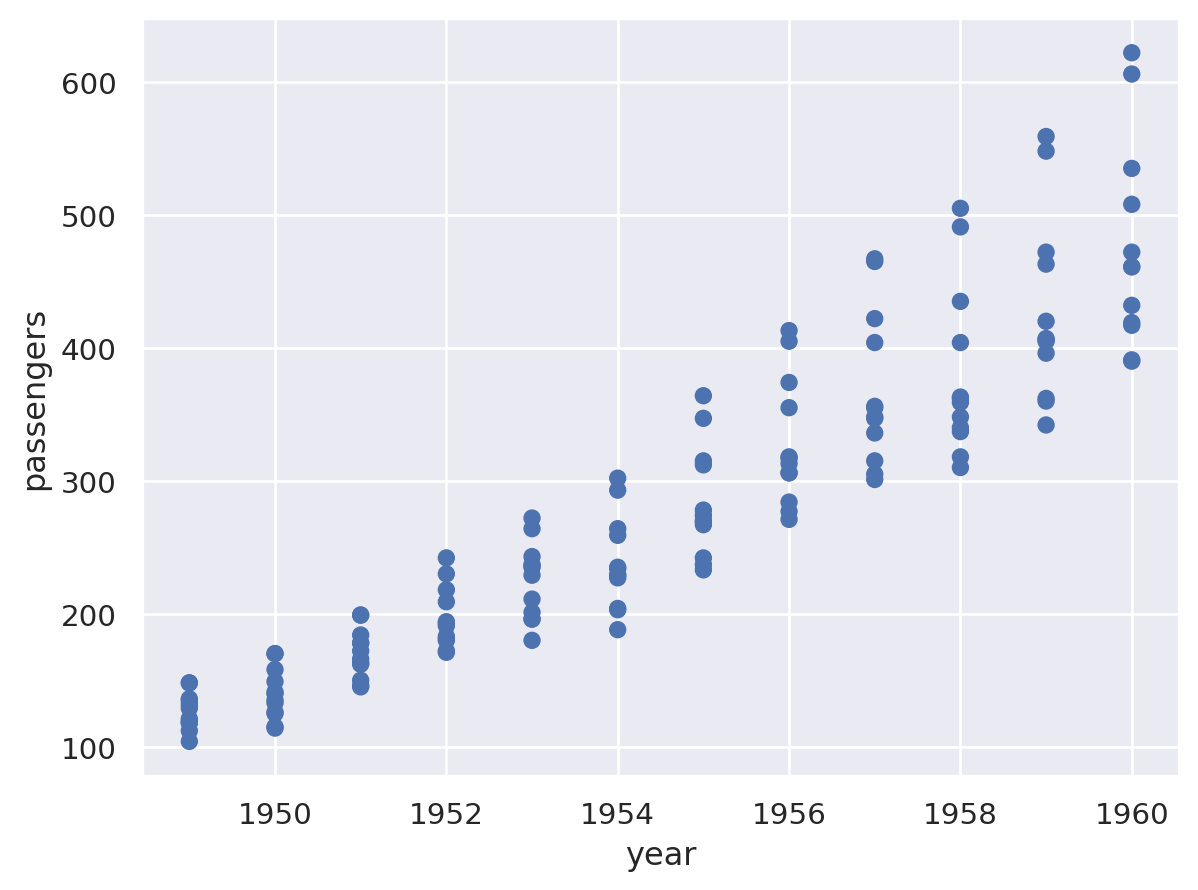

In [ ]:
so.Plot(data = df, x = "year", y = "passengers").add(so.Dot())
#grafico los pasajeros, correspondientes a todos los meses del año, por cada año.

<ipython-input-20-51e6954058a2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pasajerosEnEnero=df.groupby("month").get_group("Jan")


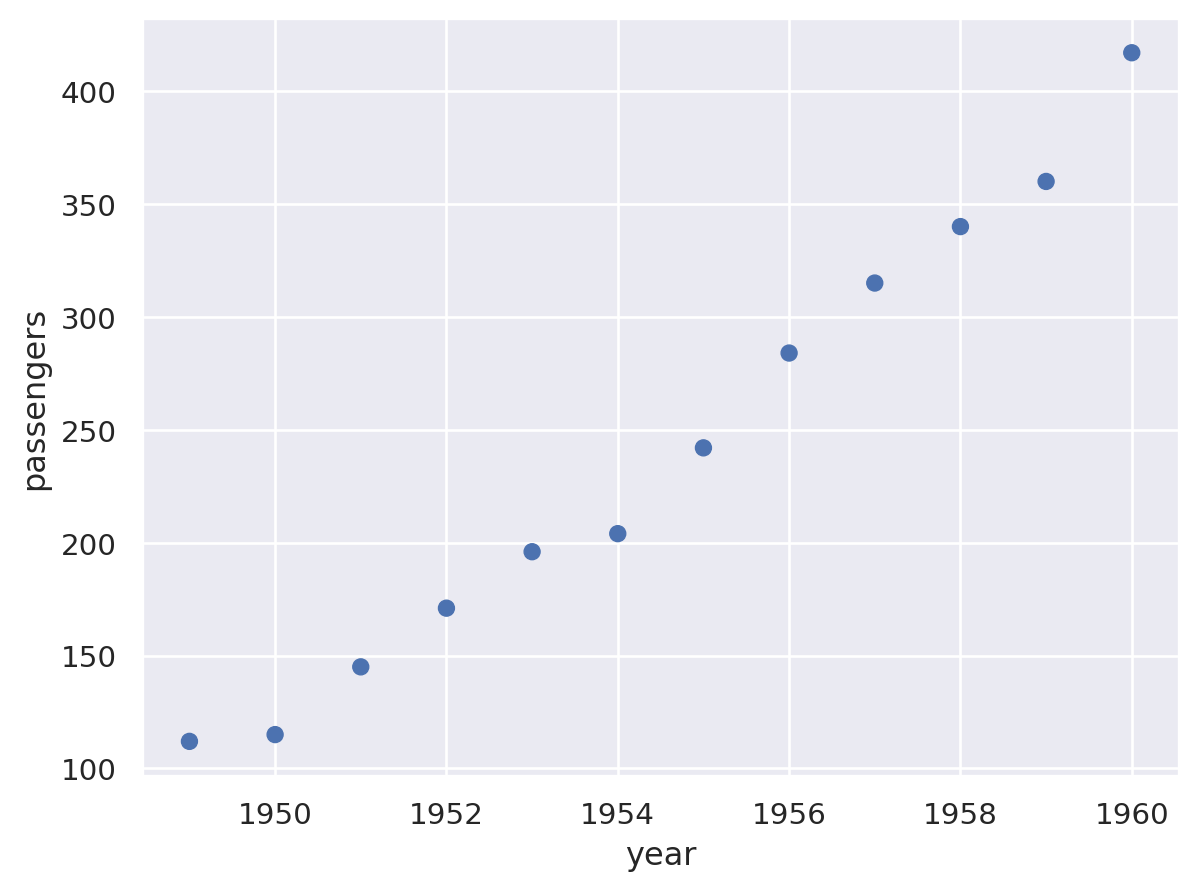

In [ ]:
pasajerosEnEnero=df.groupby("month").get_group("Jan")
so.Plot(data = pasajerosEnEnero, x = "year", y = "passengers").add(so.Dot())
#gráfico los pasajeros de enero de cada año.

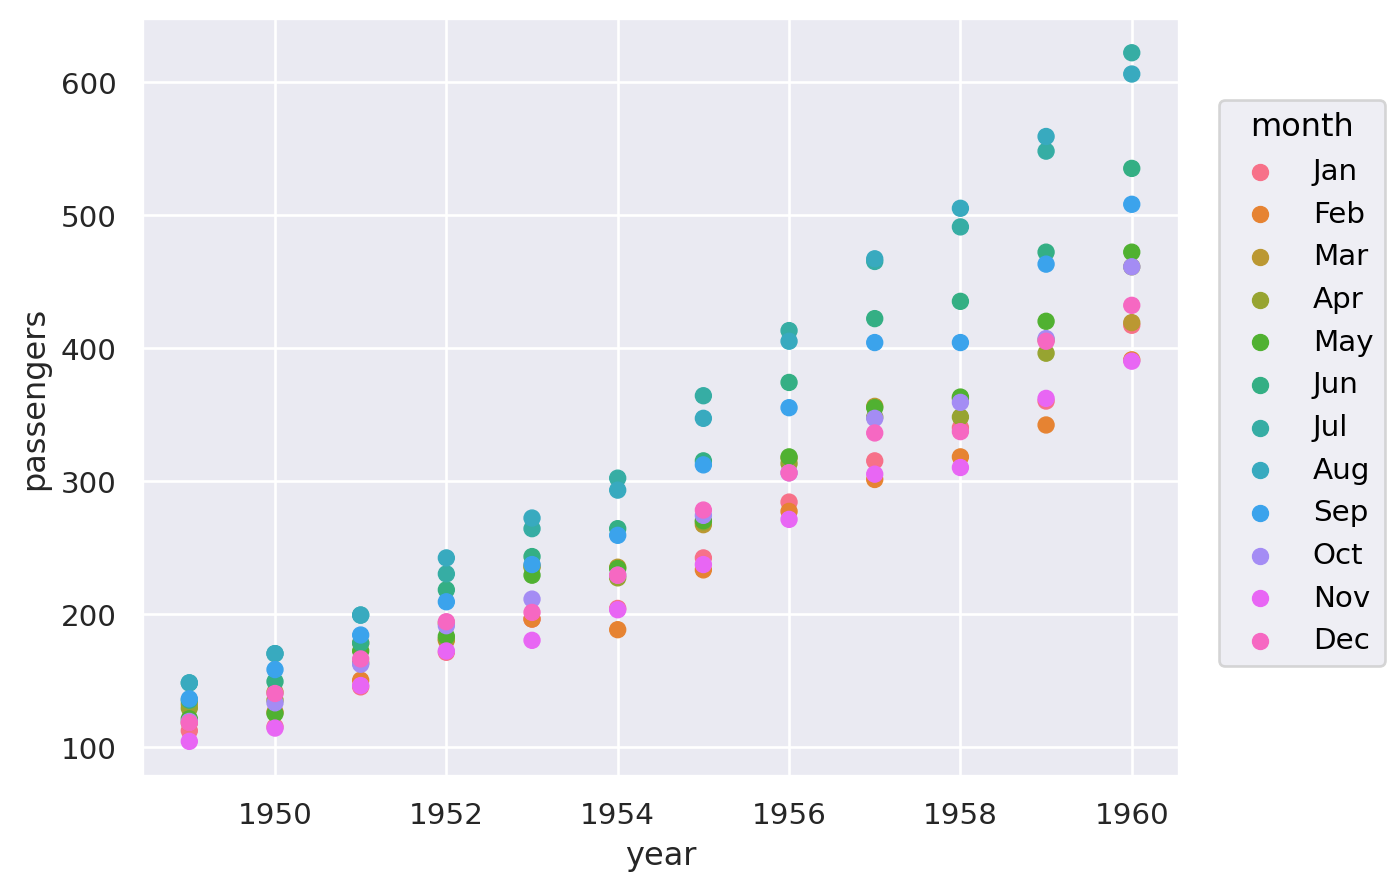

In [ ]:
so.Plot(data = df, x = "year", y = "passengers", color="month").add(so.Dot())
#grafico los pasajeros por mes, por año. Cada color corresponde a un mes.

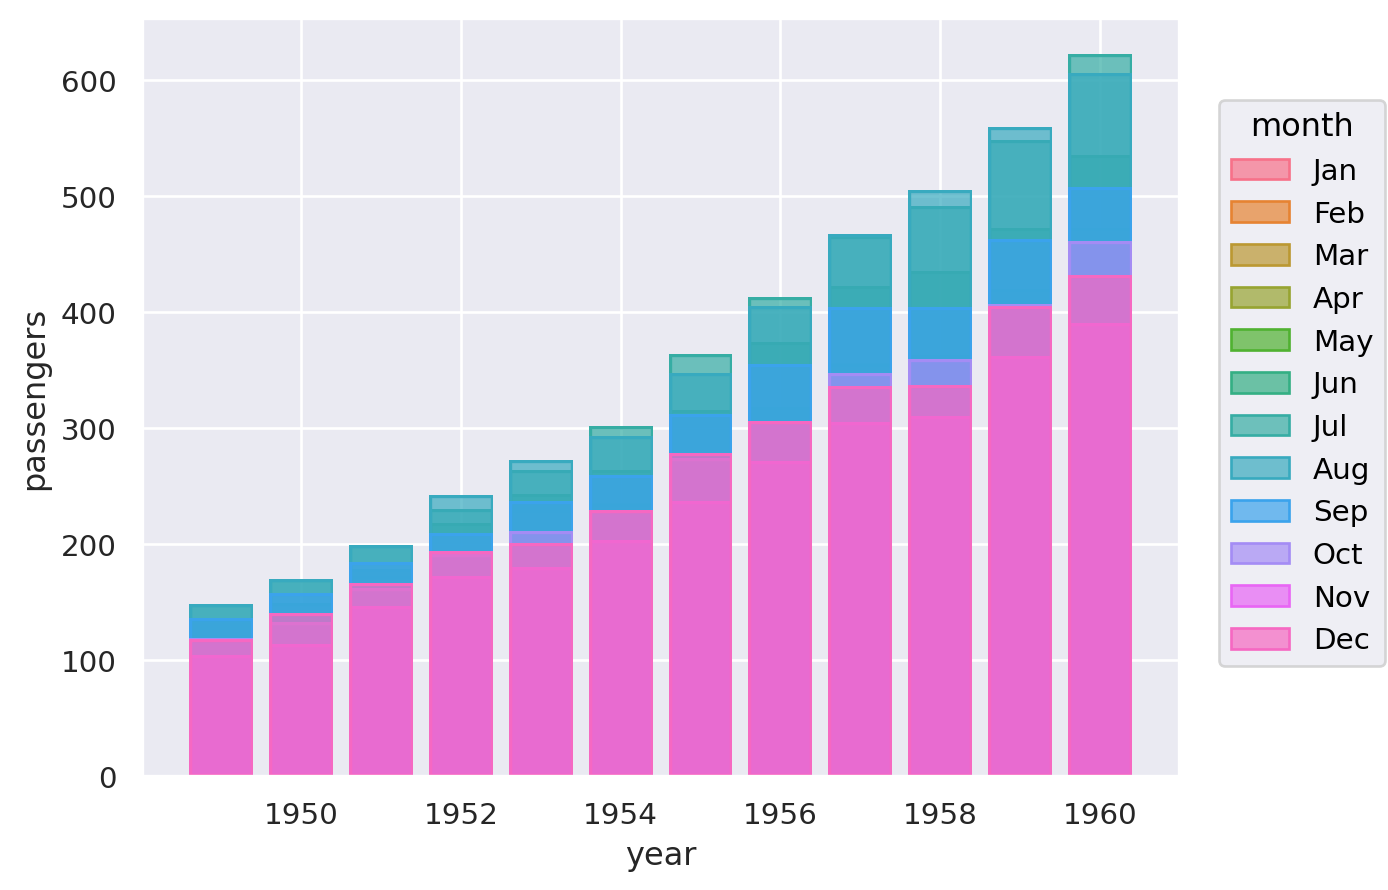

In [ ]:
#pasamos de puntos a barras
so.Plot(data = df, x = "year", y = "passengers",color="month").add(so.Bar()) #bar es para variable discreta y bars continua

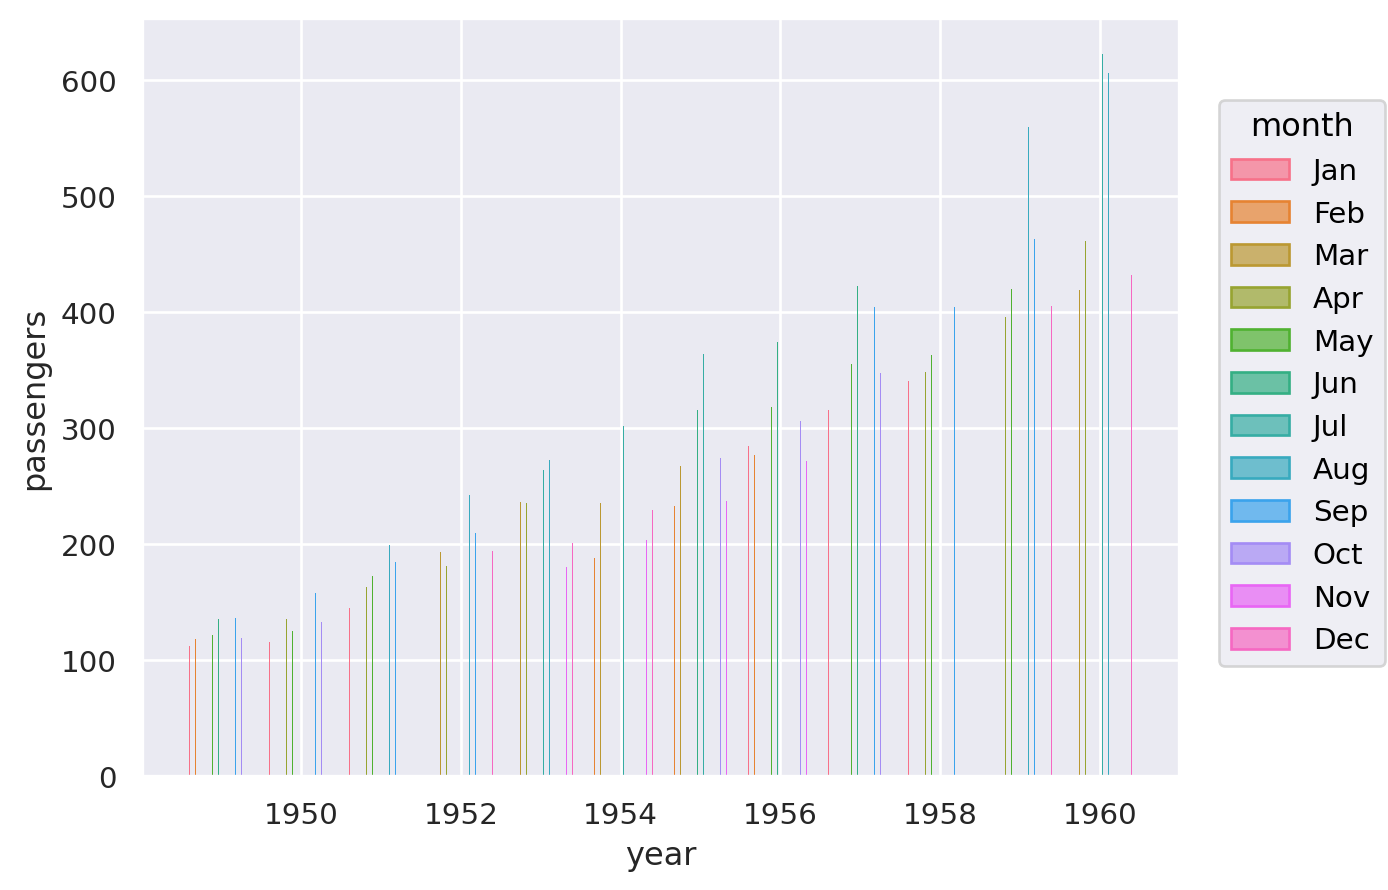

In [ ]:
so.Plot(data = df, x = "year", y = "passengers",color="month",group="month").add(so.Bar(), so.Dodge())


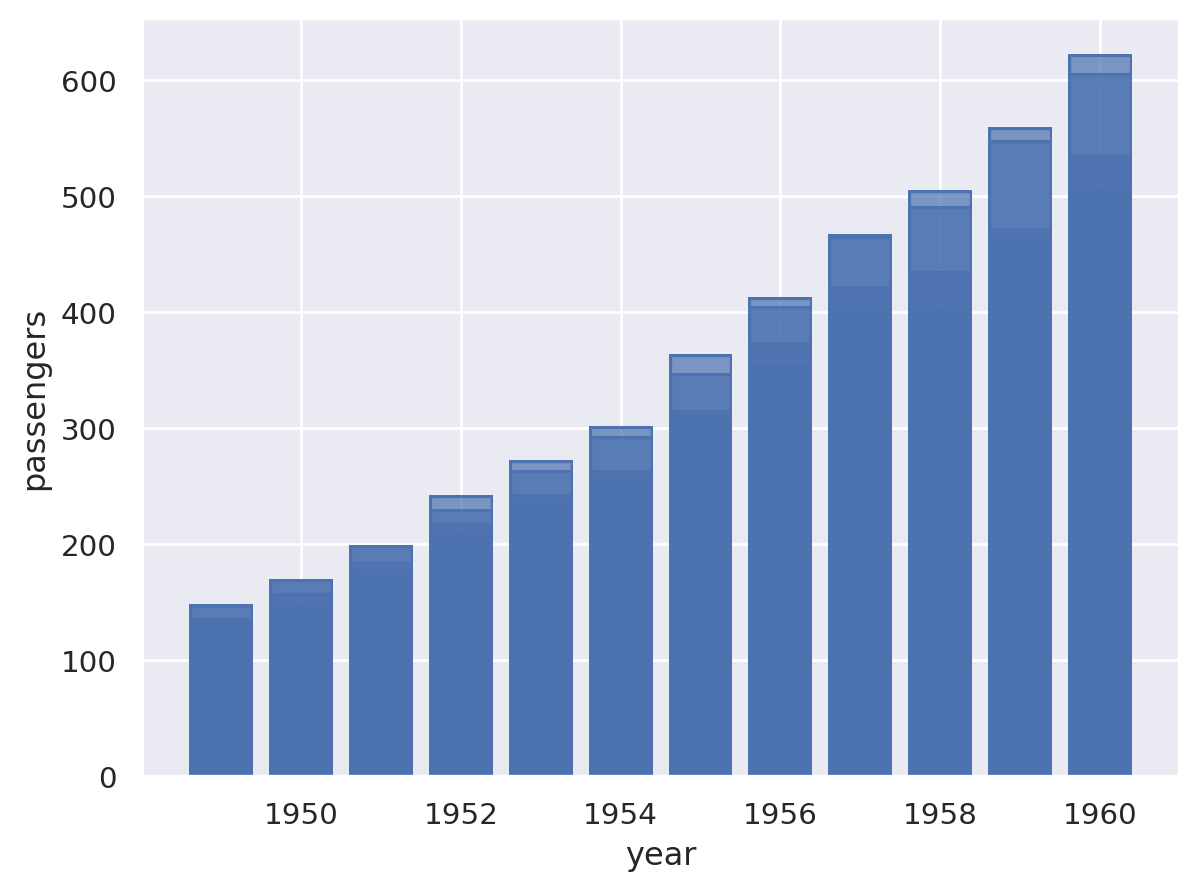

In [ ]:
so.Plot(data = df, x = "year", y = "passengers",group="month").add(so.Bar()) #los agrupa pero no se ve porque estan superpuestos

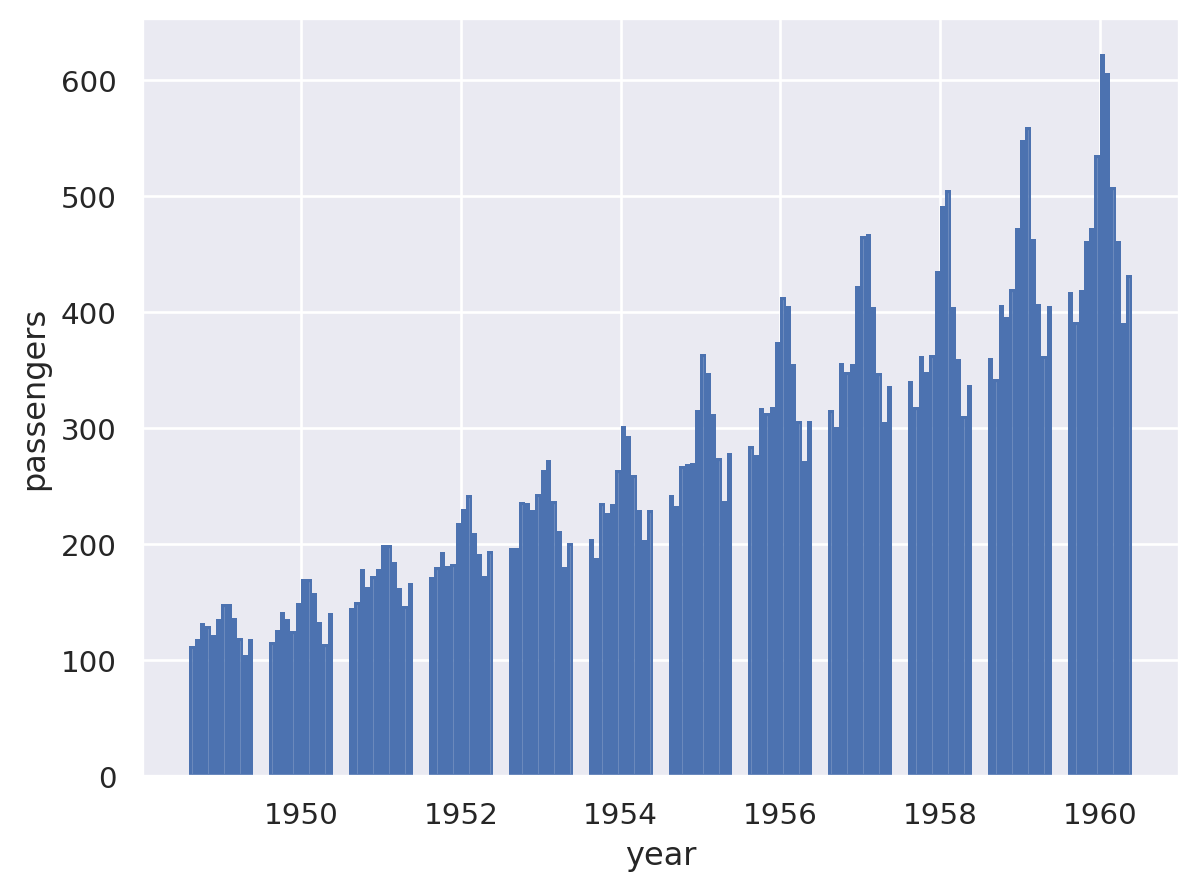

In [ ]:
so.Plot(data = df, x = "year", y = "passengers",group = 'month').add(so.Bar(), so.Dodge())

### Agregando resultados

Seaborn acepta el resultado de varias operaciones sobre dataframes (como `groupby`)
```python
(
    so.Plot(data=df.groupby("year").agg({"passengers": "sum"}), x="year", y="passengers")
    .add(so.Dot())
)
```
pero se puede hacer **mucho mejor** pasando argumentos de transformación a `.add`: `.add(so.Dot(), so.Agg("mean"))`

**Para pensar y resolver en grupo:**
1. Hacé un gráfico de puntos para el total de pasajeros por año.
2. Hacé un grafico de puntos que simultaneamente muestre, el valor medio, máximo y mínimo por año.
3. Colorea maximo y minimo en rojo, valor medio en negro
4. Cambia los gráficos de puntos a lineas.
5. ¿Para que sirve el comando "Range"? ¿Cómo podrías usarlo en este caso?

**Extra**:
- Agrega una columna que tenga los meses en formato número.
- A partir de esta columna, genera una con la fracción de año.
- Finalmente, crea una columna que tenga el año + fracción de año
- Grafica el numero de pasajeros vs. esta columna.

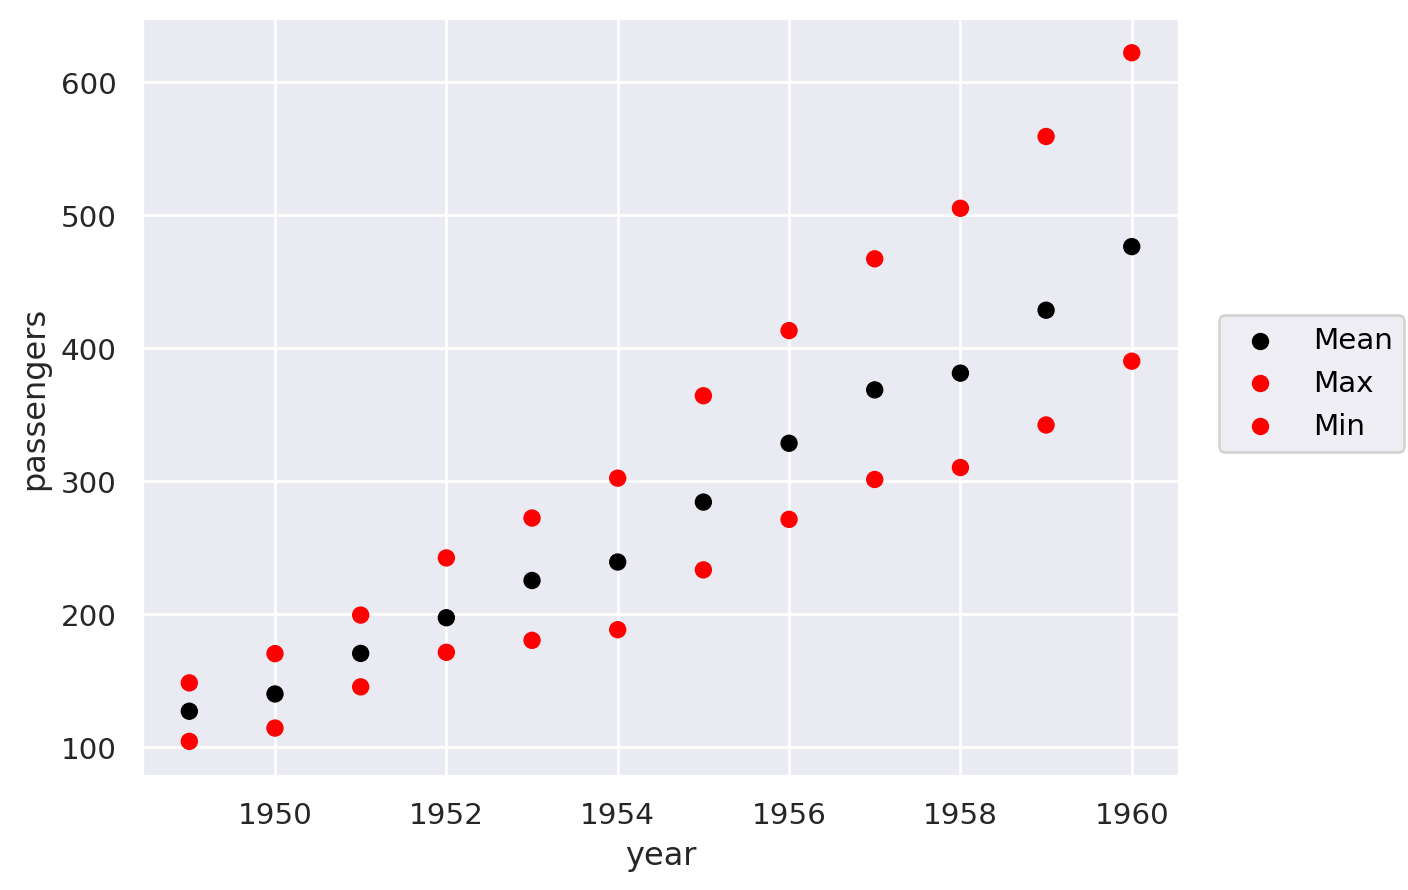

In [ ]:
so.Plot(data=df, x="year", y="passengers").add(so.Dot(color="black"),so.Agg("mean"), label="Mean").add(so.Dot(color="red"),so.Agg("max"),label="Max").add(so.Dot(color="red"),so.Agg("min"),label="Min")


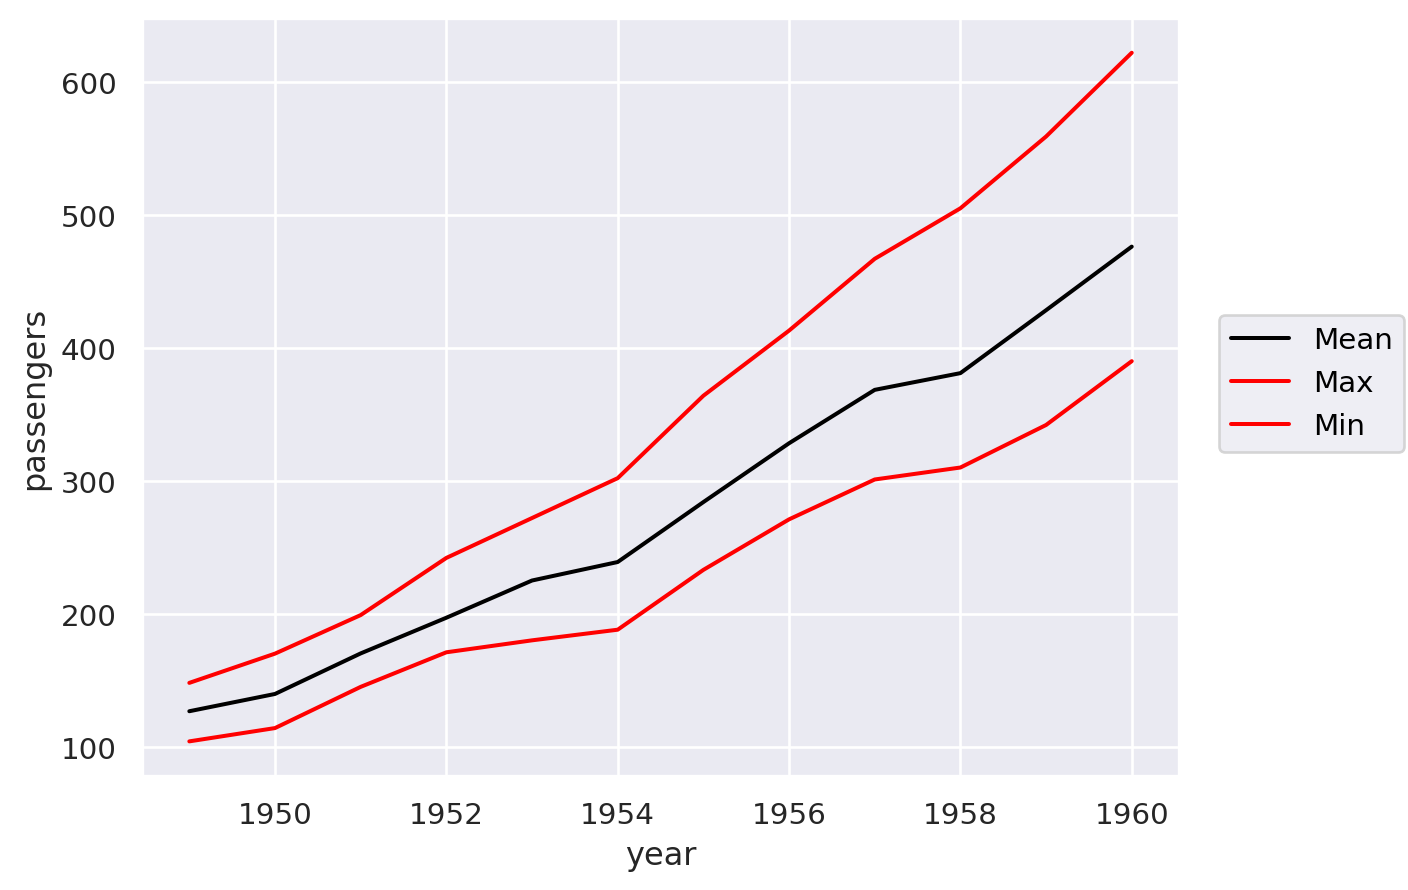

In [ ]:
so.Plot(data=df, x="year", y="passengers").add(so.Line(color="black"),so.Agg("mean"), label="Mean").add(so.Line(color="red"),so.Agg("max"),label="Max").add(so.Line(color="red"),so.Agg("min"),label="Min")

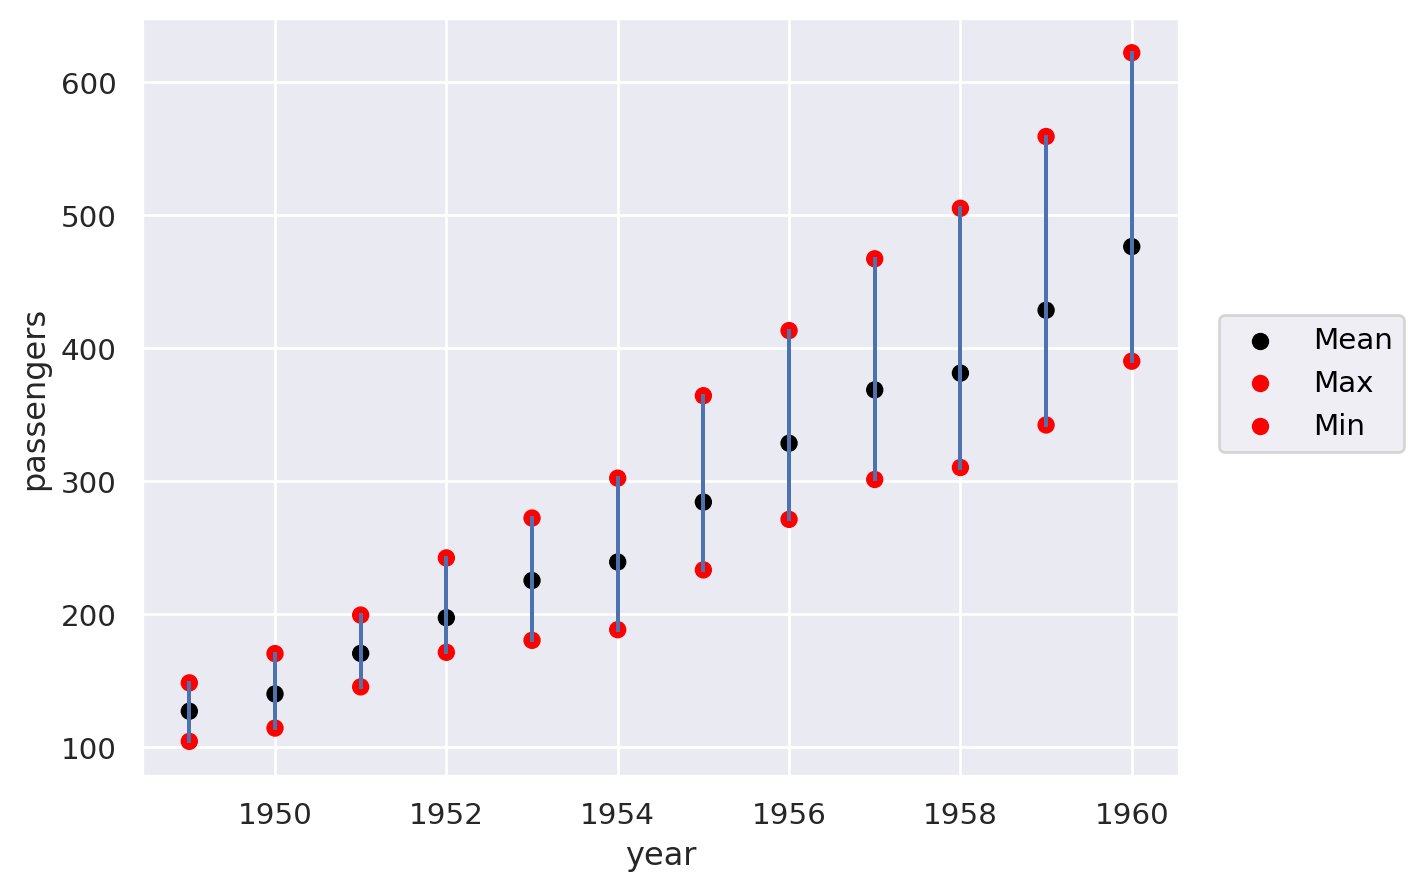

In [ ]:
so.Plot(data=df, x="year", y="passengers").add(so.Dot(color="black"),so.Agg("mean"), label="Mean").add(so.Dot(color="red"),so.Agg("max"),label="Max").add(so.Dot(color="red"),so.Agg("min"),label="Min").add(so.Range())
#range marca una linea entre el max y el minimo


In [ ]:
#agrego una columna con los meses númerados del 1 al 12
df["month_number"]=df["month"].map({"Jan":1,"Feb":2,"Mar":3,"Apr":4,"May":5,"Jun":6,"Jul":7,"Aug":8,"Sep":9,"Oct":10,"Nov":11,"Dec":1})
df["year_fraction"]=df["month_number"]/12
df["year + year_fraction"]=df["year"]+df["year_fraction"]
df.head()

,year,month,passengers,month_number,year_fraction,year + year_fraction
0,1949,Jan,112,1,0.083333,1949.083333
1,1949,Feb,118,2,0.166667,1949.166667
2,1949,Mar,132,3,0.250000,1949.250000
3,1949,Apr,129,4,0.333333,1949.333333
4,1949,May,121,5,0.416667,1949.416667


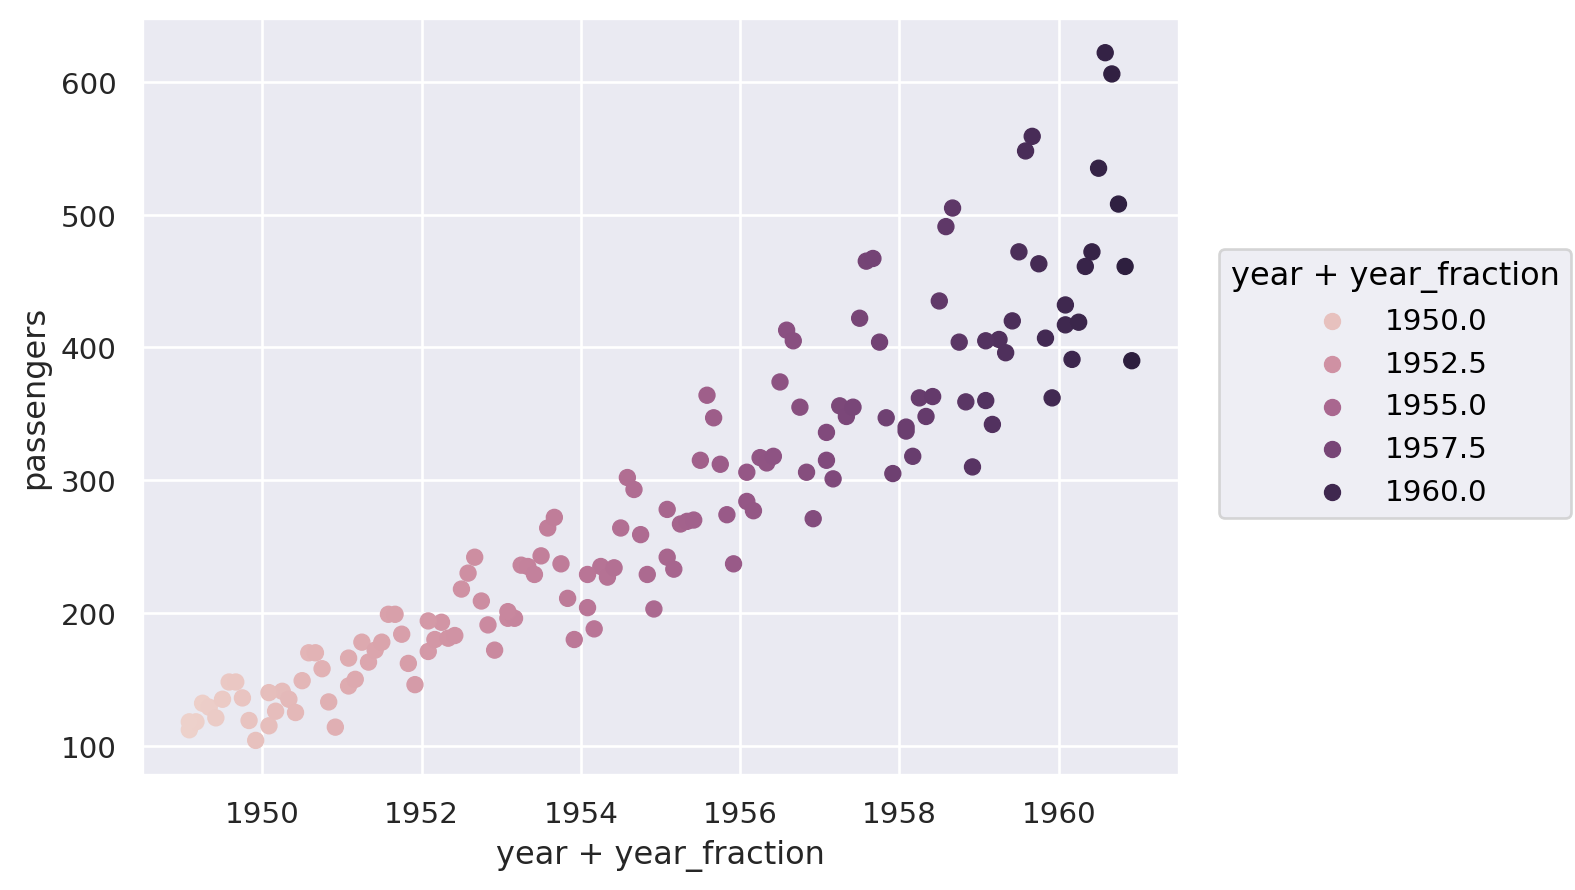

In [ ]:
so.Plot(data=df, x="year + year_fraction", y="passengers",color="year + year_fraction").add(so.Dot())

### Desagregar

Para esta parte vamos a utilizar el dataset **titanic**, también incluido en seaborn.
1. ¿Qué columnas tiene?
2. ¿Qué tipo de datos hay en cada columna?
3. Tiene sentido que 'survived' sea una variable numérica? Generá una columna categórica para survived (survived_cat) y en los gráficos de los próximos puntos, mirá que cambia al usar una u otra.

In [ ]:
titanic=sns.load_dataset("titanic")
print(titanic.columns)
print(titanic.dtypes)
titanic["survived_cat"]=titanic["survived"].map({0:False,1:True})
titanic.head()

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,survived_cat
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,True
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False


Vamos a analizar estos datos para ver qué variables explican la población que sobrevivió y la que no al accidente en el Titanic. Para esto:
1. Arma un gráfico de puntos de puntos mostrando la edad de los pasajeros.
2. Agregá la información por clase. ¿Te parece que las poblaciones de edad en las distintas clases son similares? Usá so.Jitter() para mejorar la visualización.
3. Usá el color para distinguir entre quienes sobrevivieron o no. Acordate de probar con la variable original survived y con la variable categórica que generaste antes para ver qué cambia en los gráficos.
4. Repetí el gráfico del punto anterior usando boxplots (sns.boxplot). ¿Es más fácil interpretar los datos?
5. Repetí el gráfico del punto anterior, usando el color para la clase y el eje horizontal para supervivencia. ¿Cual de los dos gráficos te parece más claro?
6. Elegí otras dos variables, una que creas que influye y otra que no en la supervivencia, y graficá para verificar tus hipótesis.
7. Concluí cómo está constituída la población de sobrevivientes.

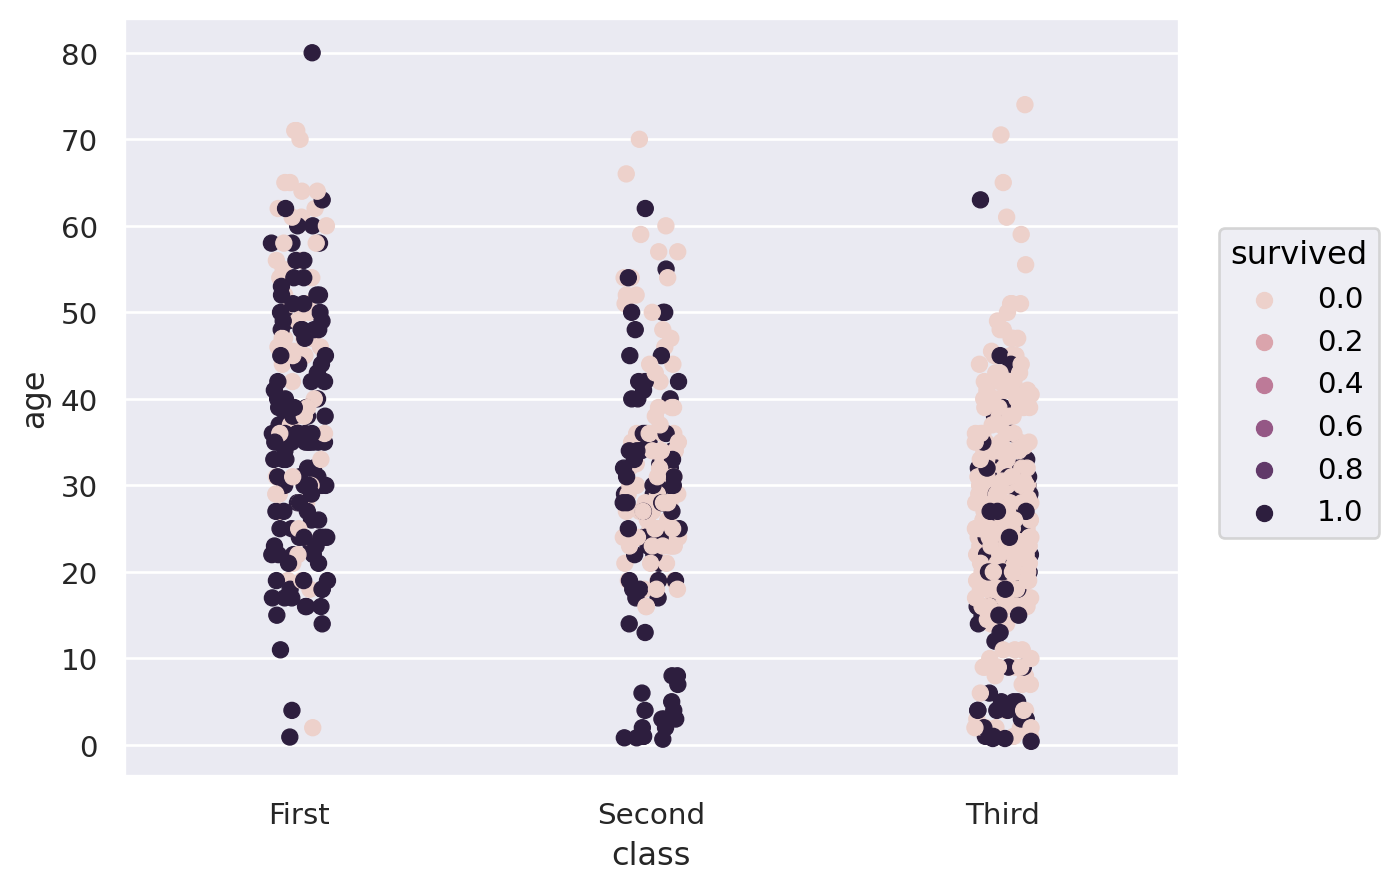

In [ ]:
so.Plot(data=titanic, x="class",y="age", color="survived").add(so.Dot(), so. Jitter())

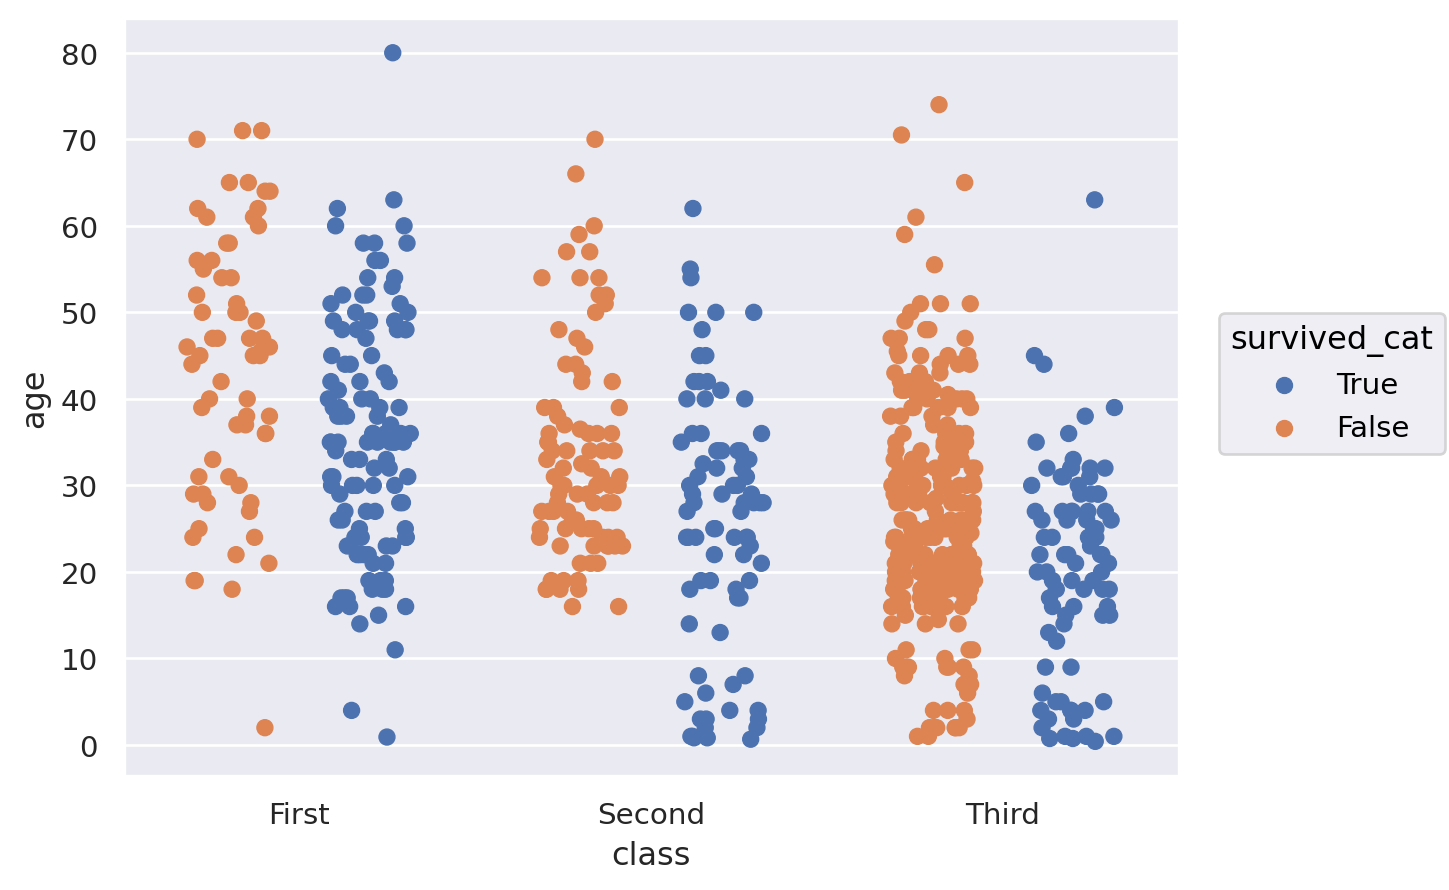

In [ ]:
so.Plot(data=titanic, x="class",y="age", color="survived_cat").add(so.Dot(), so. Jitter(0.3),so.Dodge()) #soJitter es aleatorio en ambas direcciones
                                                                                                         #soDodge es en una direccion y con una categoria especifica

<Axes: xlabel='class', ylabel='age'>

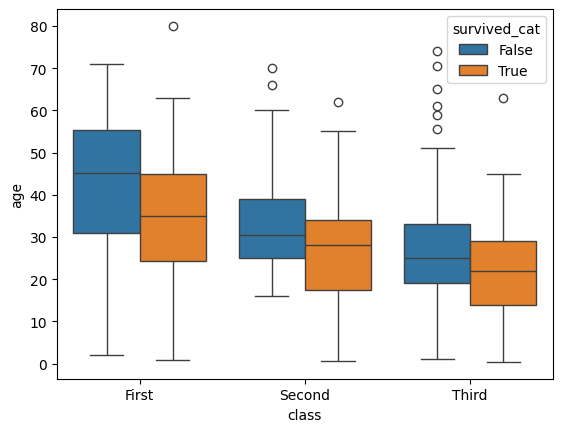

In [ ]:
sns.boxplot(data=titanic, x="class", y="age", hue="survived_cat")

<Axes: xlabel='class', ylabel='survived'>

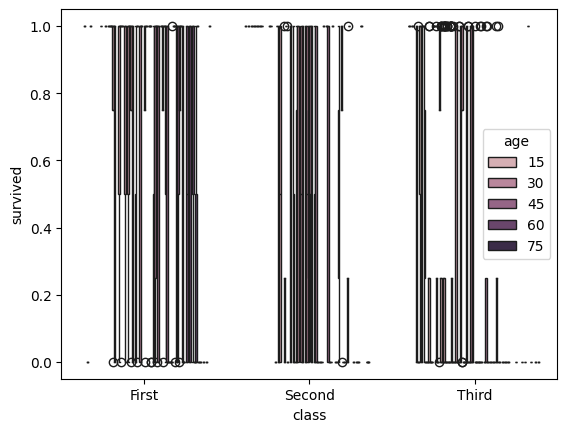

In [ ]:
sns.boxplot(data=titanic, x="class", y="survived", hue="age")

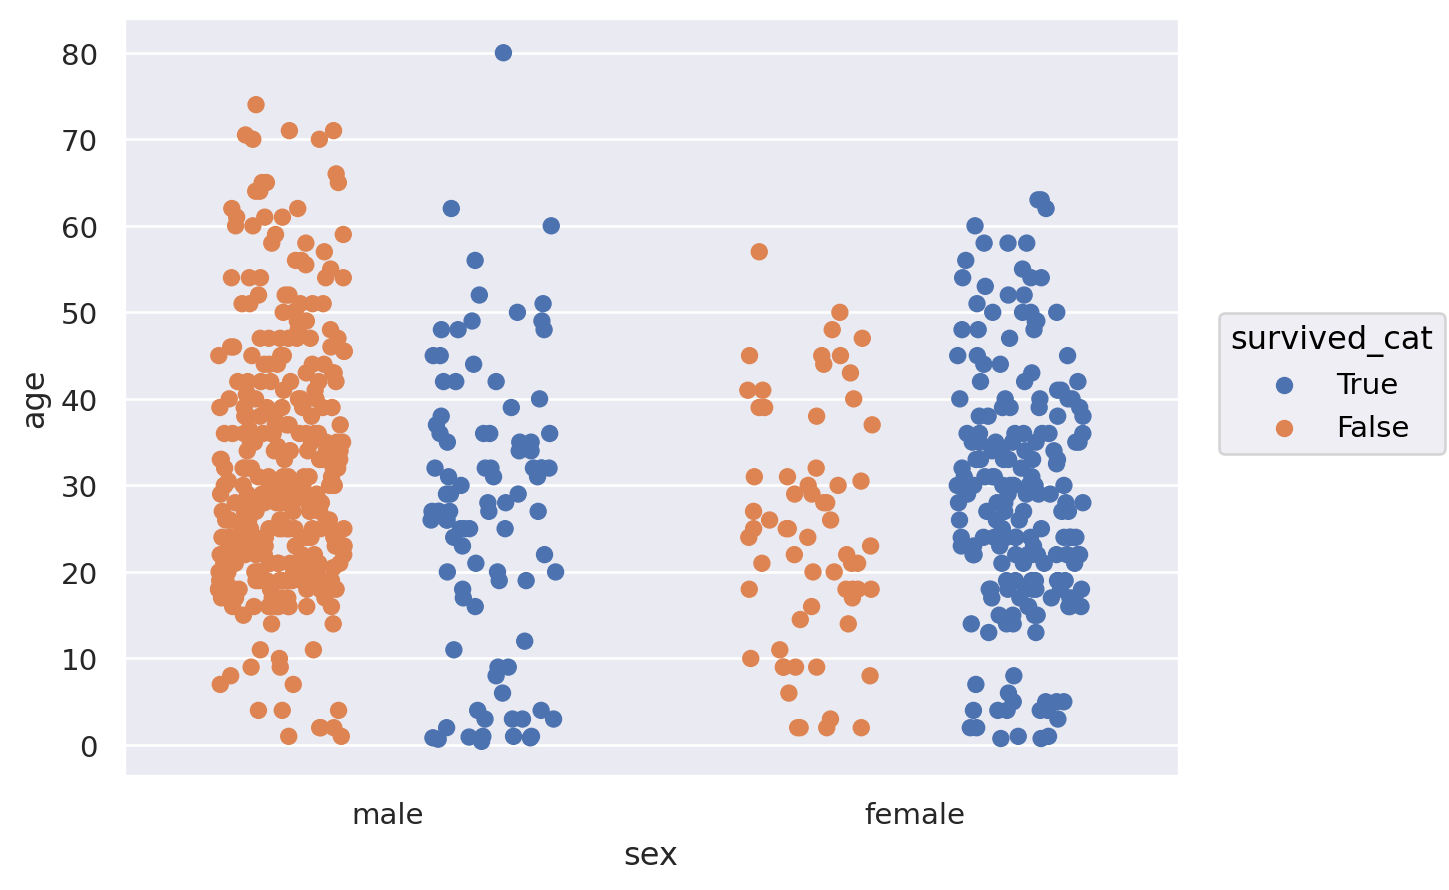

In [ ]:
so.Plot(data=titanic, x="sex",y="age", color="survived_cat").add(so.Dot(), so. Jitter(0.3),so.Dodge())

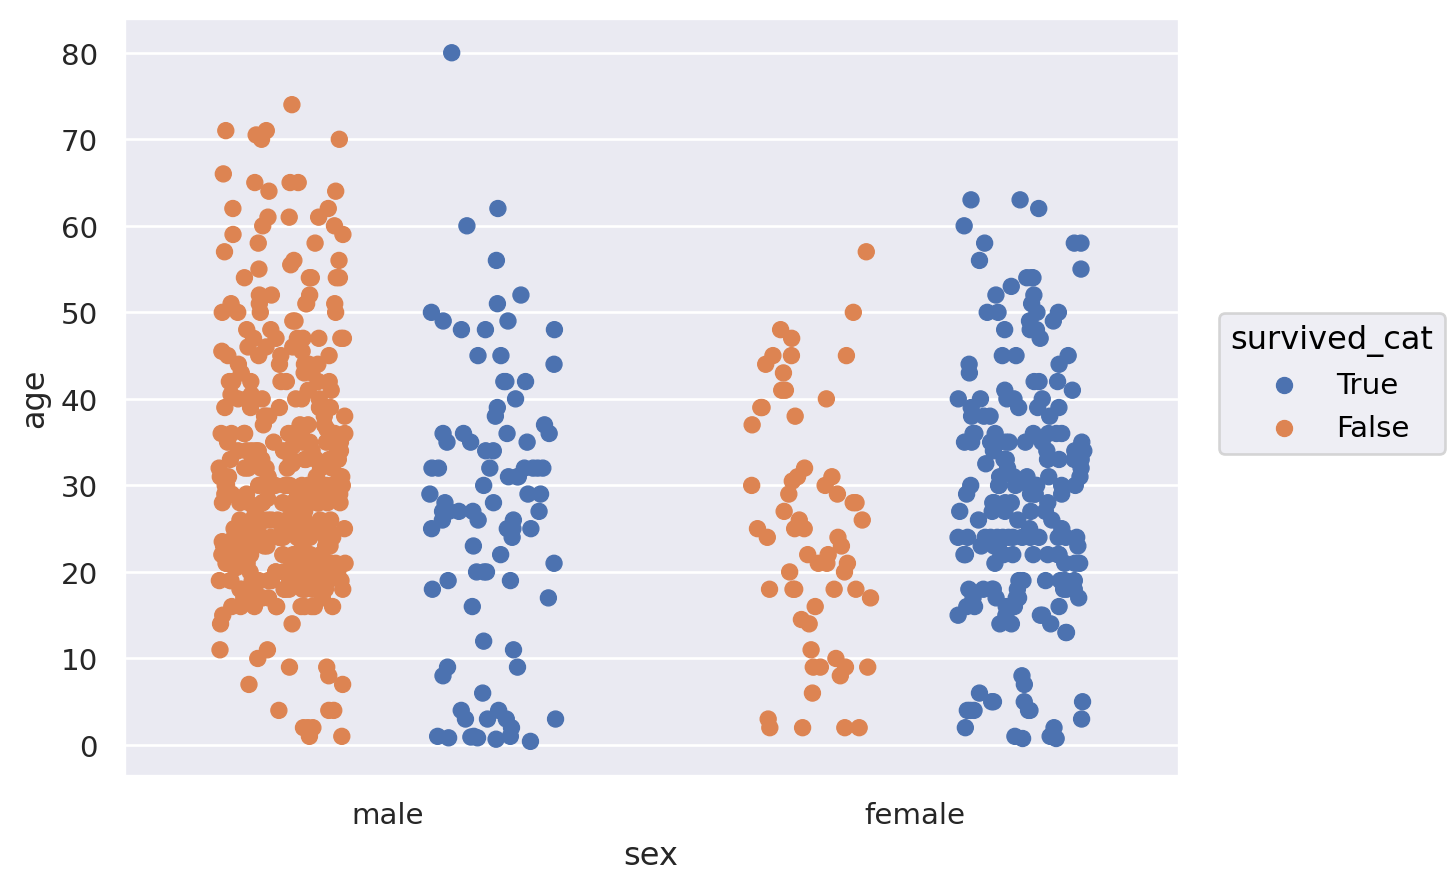

In [ ]:
so.Plot(data=titanic, x="sex",y="age", color="survived_cat").add(so.Dot(), so. Jitter(0.3),so.Dodge())

<Axes: xlabel='sex', ylabel='age'>

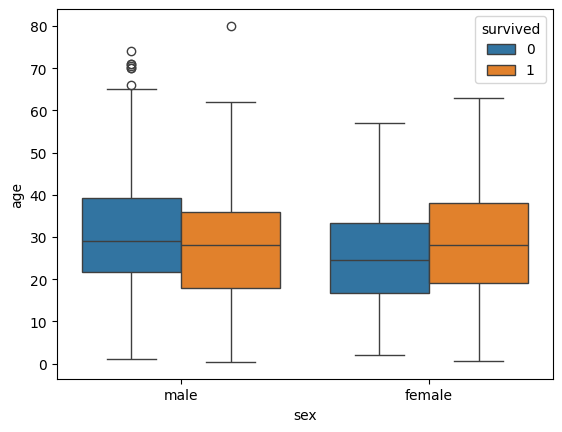

In [ ]:
sns.boxplot(data=titanic, x="sex", y="age", hue="survived")

### Histogramas

Seaborn también permite hacer histogramas
1. Arma un histograma de la edad de los pasajeros.
2. Desagrega por clase usando el comando facets.
3. Desagrega por si sobrevivio o no
4. ¿Qué opciones tenés para hacer esto? ¿cual te parece mas claro?

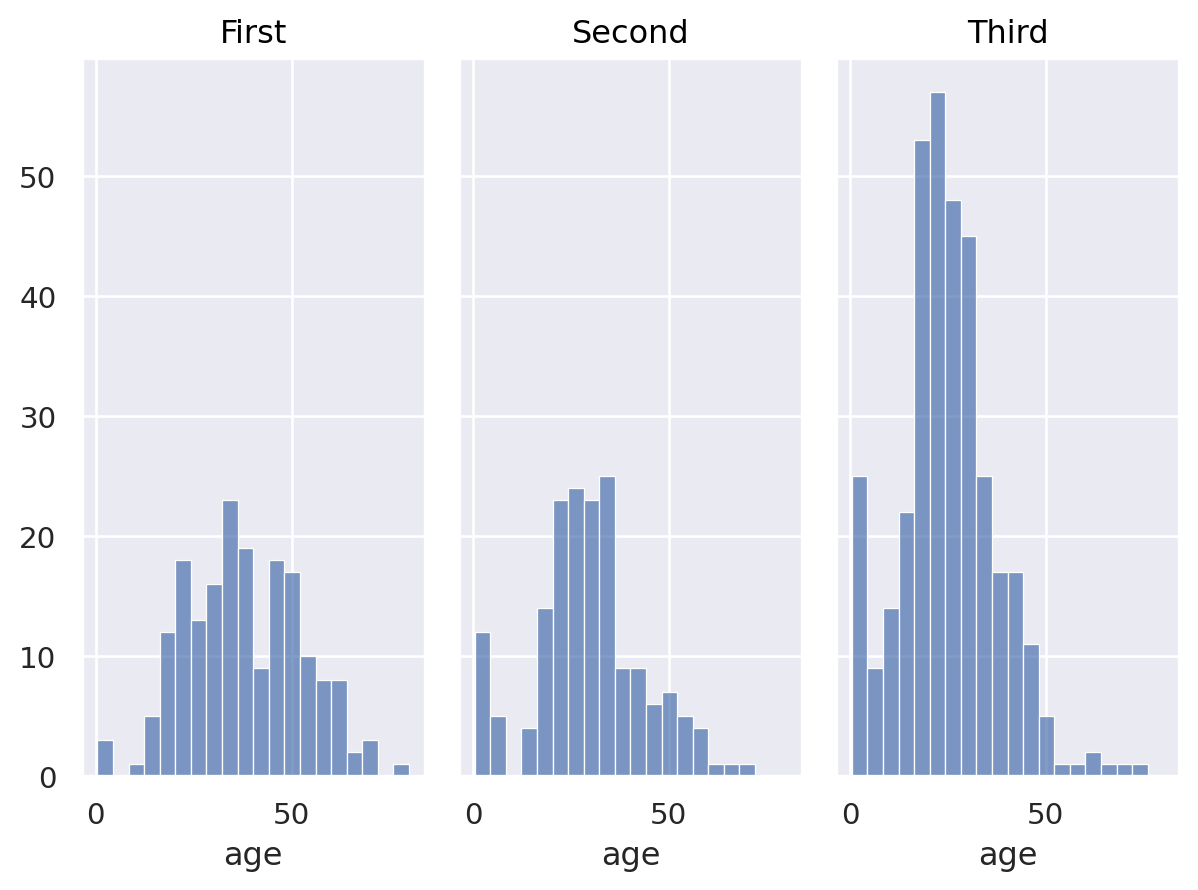

In [ ]:
x=so.Plot(data=titanic, x="age").add( so.Bars(),so.Hist()) #el hist es un conjunto de inter y valores, y bars los grafica
x.facet("class")

*Para probar en casa*:
- ¿Qué es y como se lee un boxplot? Hace uno con Seaborn.
- ¿Cómo podés cambiar algunos aspectos visuales del gráfico como los nombres de los ejes, los tamaños de las letras, la posición de la leyenda, la paleta de colores y muchos mas. Mirá la documentación de seaborn para hacer esto: https://seaborn.pydata.org/generated/seaborn.objects.Plot.html
